**Loan Default Prediction Dataset ANALYSIS**

IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

IMPORTING THE DATASET

In [2]:
import zipfile
zip_path = "/content/archive (6).zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("extracted_files")
csv_file = "extracted_files/Loan_default.csv"

EXPLORATORY DATA ANALYSIS

In [3]:
df = pd.read_csv(csv_file)
df.head() # Show first 5 rows

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [ ]:
df.sample(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
169895,5XDVY63GHC,47,110679,123385,361,45,2,2.48,60,0.49,Master's,Full-time,Married,Yes,Yes,Home,Yes,0
74322,5PLVOYCSFJ,45,90589,60963,528,99,1,22.24,48,0.76,High School,Part-time,Divorced,No,Yes,Auto,No,0
195054,73VS53BS4J,22,88059,83050,502,116,1,7.02,36,0.77,High School,Self-employed,Divorced,No,Yes,Auto,Yes,1
250294,0PPAFOFFZO,65,22287,199184,353,108,2,8.51,36,0.64,Master's,Self-employed,Single,No,No,Auto,Yes,0
80816,9D5S2UGZ2B,49,75368,213650,535,87,4,23.80,24,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No,0


In [ ]:
df.shape

(255347, 18)

In [ ]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [ ]:
df.dtypes

,0
Age,int64
Income,int64
LoanAmount,int64
CreditScore,int64
MonthsEmployed,int64
NumCreditLines,int64
InterestRate,float64
LoanTerm,int64
DTIRatio,float64
Education,int64


In [ ]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
df['Default'].value_counts()

,count
Default,
0,225694
1,29653


In [ ]:
for col in df:
  print(col, df[col].unique())

LoanID ['I38PQUQS96' 'HPSK72WA7R' 'C1OZ6DPJ8Y' ... 'XQK1UUUNGP' 'JAO28CPL4H'
 'ZTH91CGL0B']
Age [56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]
Income [ 85994  50432  84208 ... 104108  76558 124446]
LoanAmount [ 50587 124440 129188 ... 105905 168231 208294]
CreditScore [520 458 451 743 633 720 429 531 827 480 652 375 829 395 635 432 313 811
 319 376 419 583 528 468 839 343 514 462 580 604 551 840 787 607 669 506
 540 695 707 386 747 400 639 795 498 560 505 393 369 439 634 657 417 455
 351 655 737 771 775 680 694 534 529 416 318 411 802 305 674 585 750 303
 487 730 579 658 683 574 421 719 692 542 453 618 659 371 517 701 361 578
 656 553 734 346 584 481 447 691 457 616 564 315 436 533 372 394 834 339
 415 668 748 715 479 696 751 842 769 577 602 497 714 396 513 522 335 601
 499 380 640 566 627 786 524 449 489 401 666 818 841 406 508 749 620 536
 592 541 316 609 705 424 770 407 6

In [ ]:
df.nunique()

,0
LoanID,255347
Age,52
Income,114620
LoanAmount,158729
CreditScore,550
MonthsEmployed,120
NumCreditLines,4
InterestRate,2301
LoanTerm,5
DTIRatio,81


In [ ]:
df.duplicated().value_counts()

,count
False,255347


In [6]:
target = 'Default'
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore',
                  'MonthsEmployed', 'NumCreditLines', 'InterestRate',
                  'LoanTerm', 'DTIRatio']

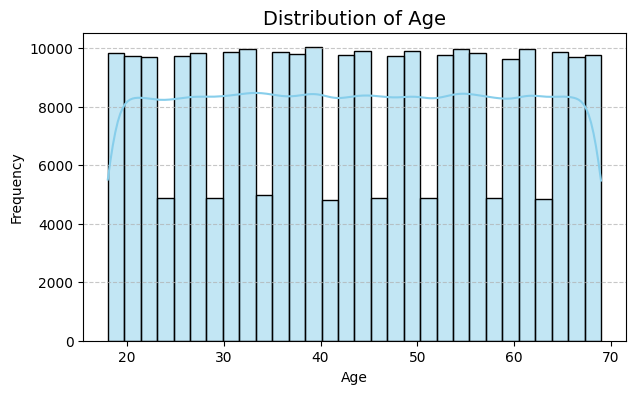

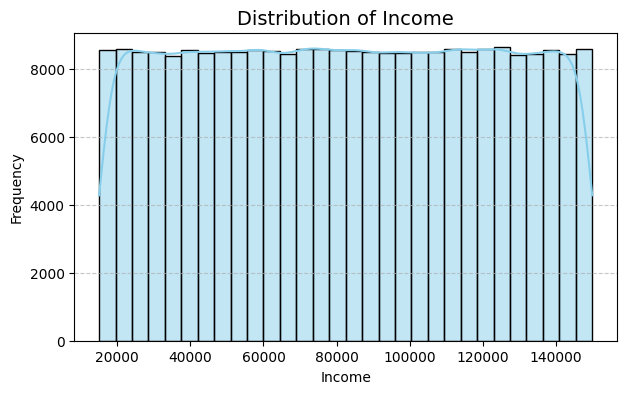

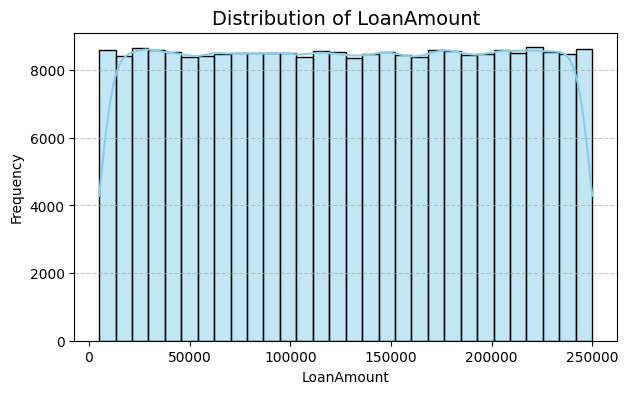

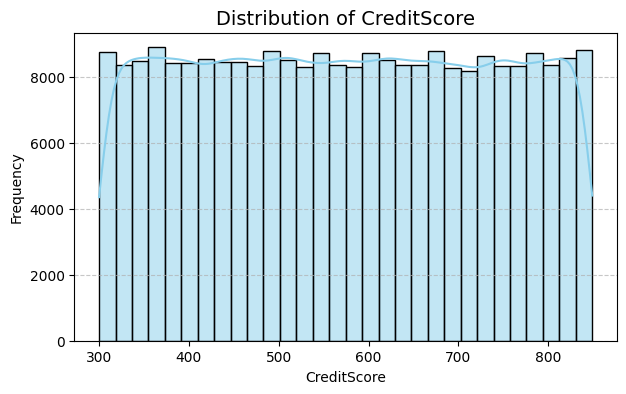

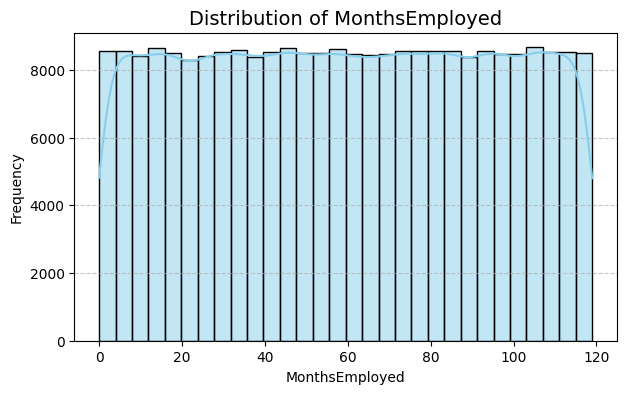

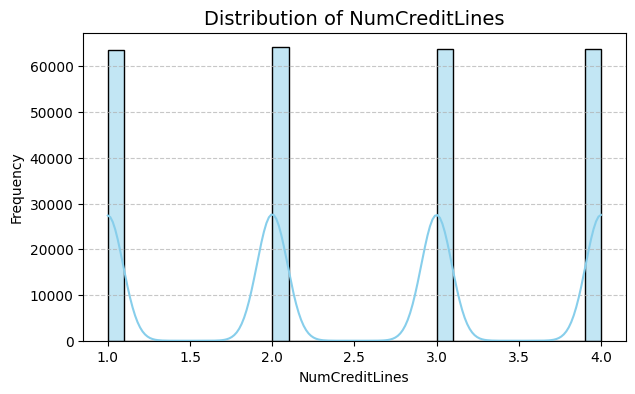

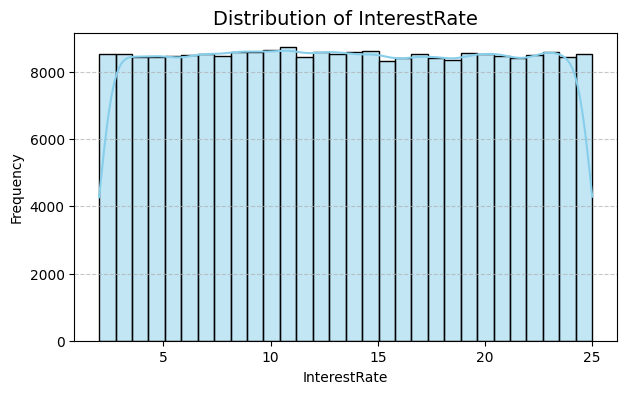

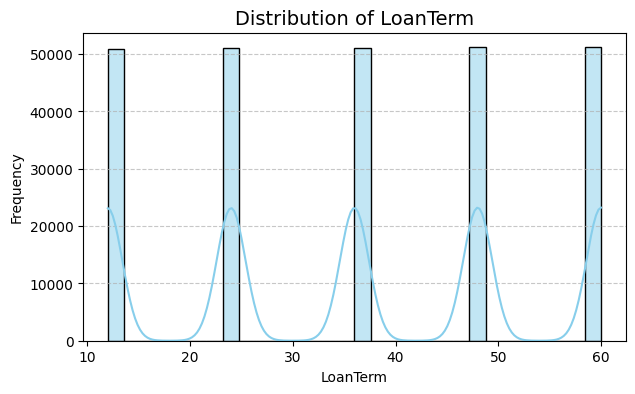

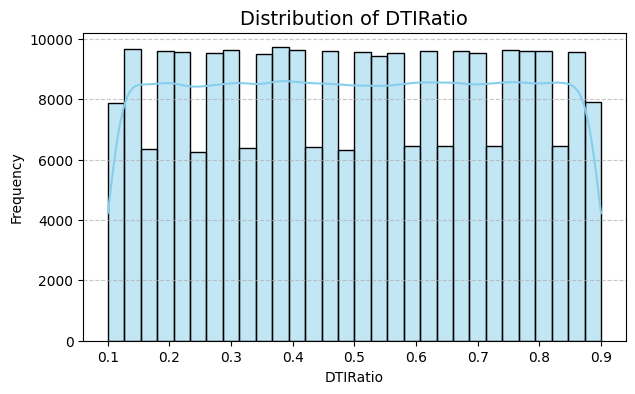

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

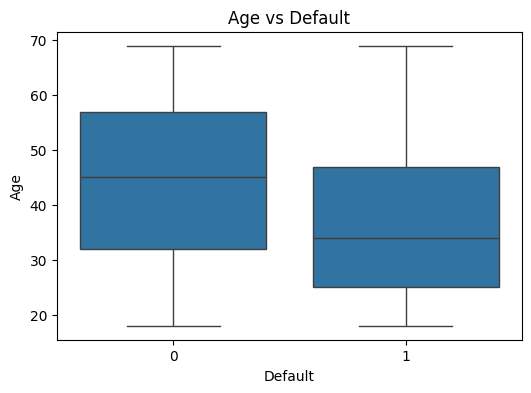

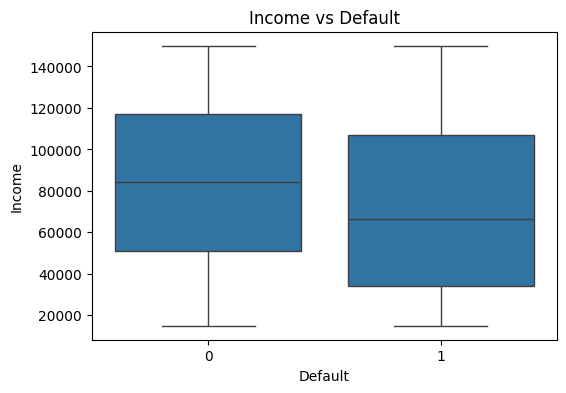

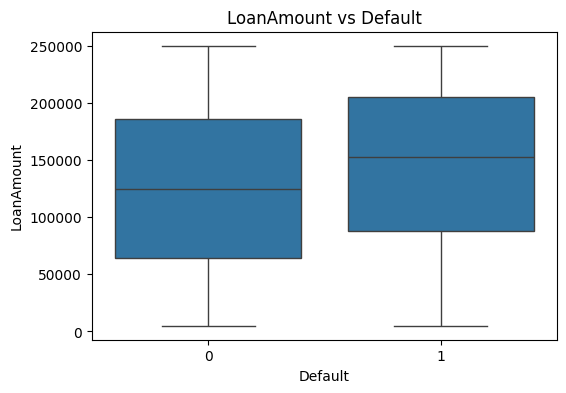

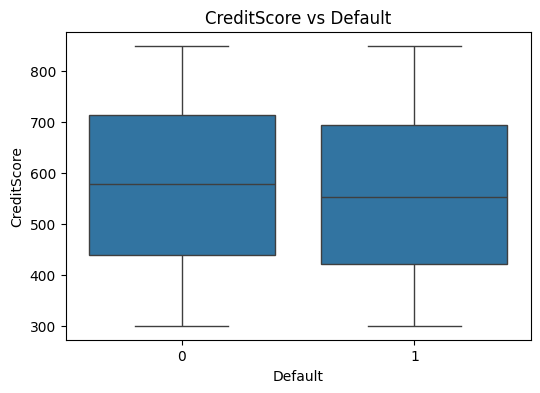

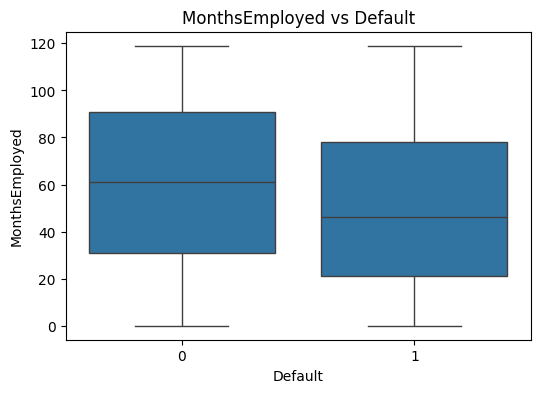

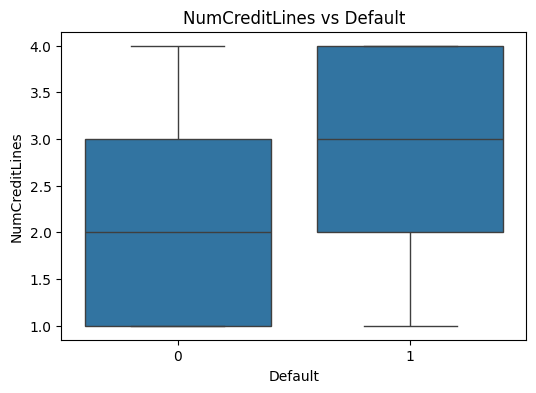

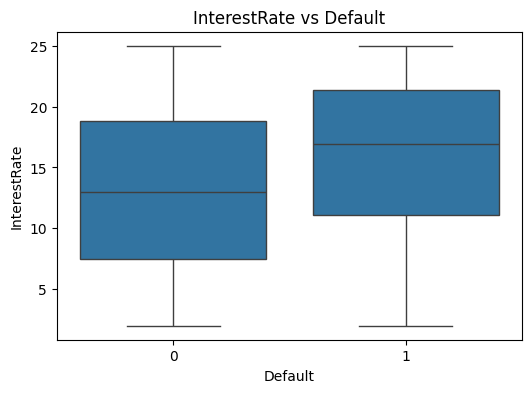

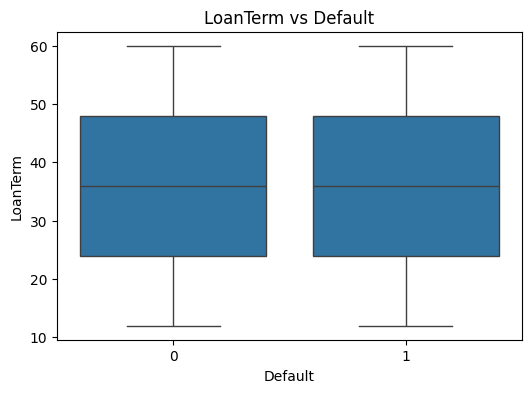

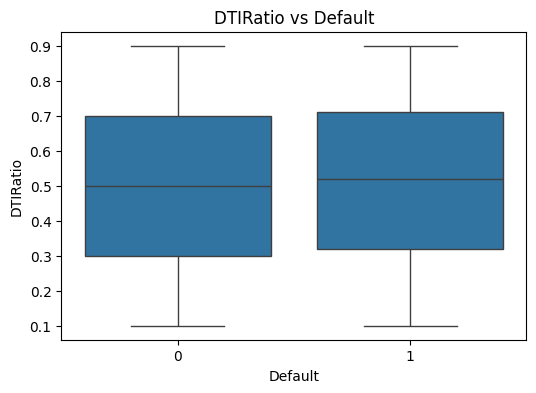

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} vs {target}")
    plt.show()

**Insights From the above Box plots**

*1. No ouliers in the Numeric columns
2. Defaults are Observed higher in the following situations:
==> Low Age , Low income, High loan amount, Less months employed, High number of Credit lines, High interest rate.*

In [11]:
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus',
                    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

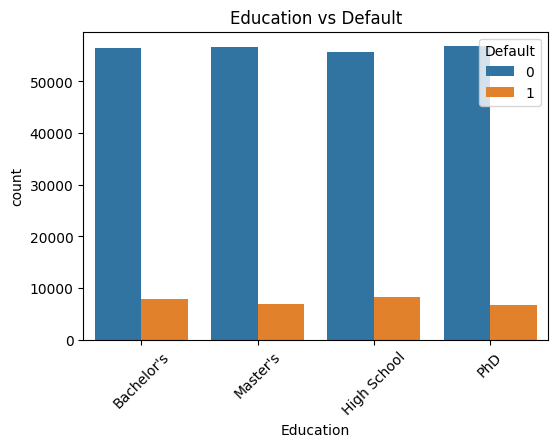

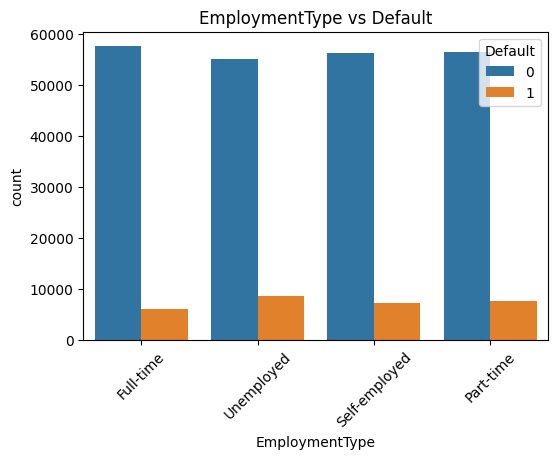

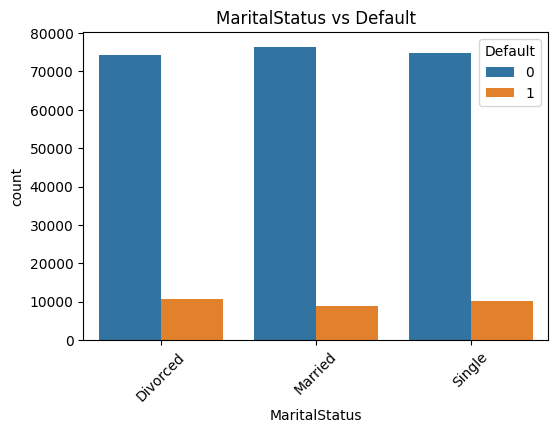

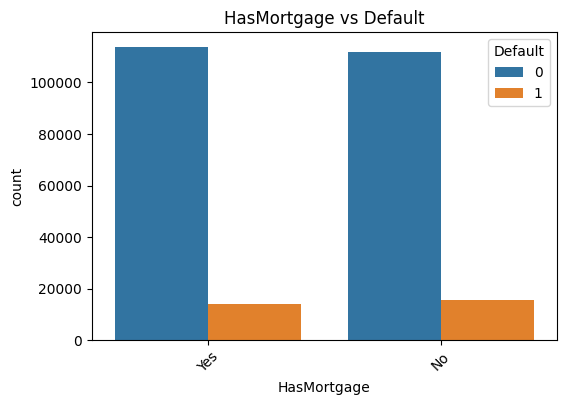

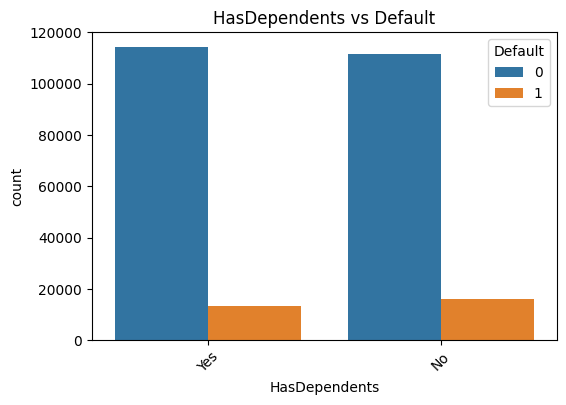

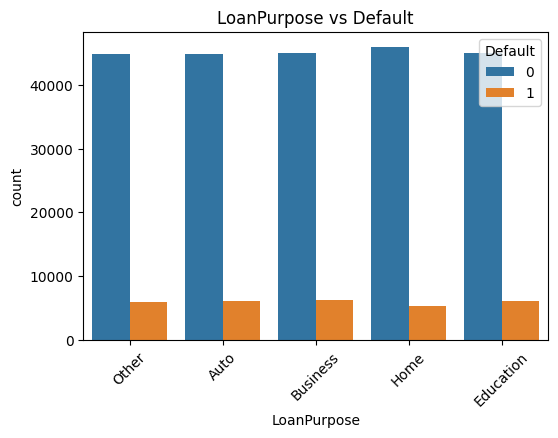

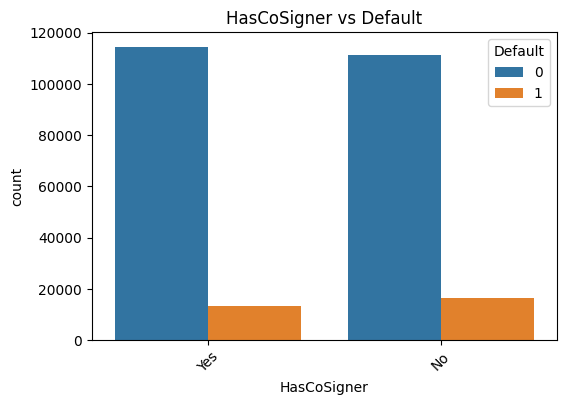

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=target, data=df)
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.show()

**#Insights From the above Count plots**
*Defaults are Observed higher in the following situations: ==> No Cosigner, Unemployed, Students(High school and bachelors), without Mortgage(collateral)*

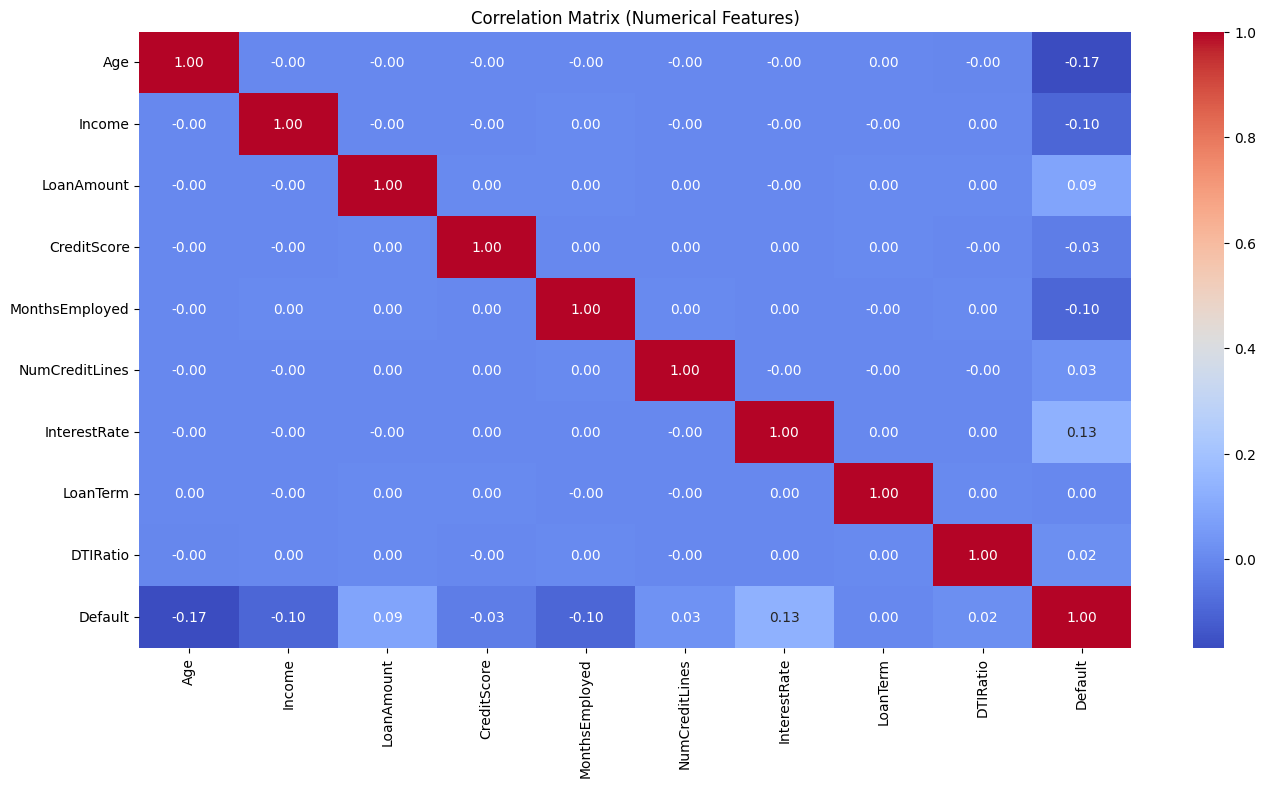

In [7]:
numerical_cols.append('Default')
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

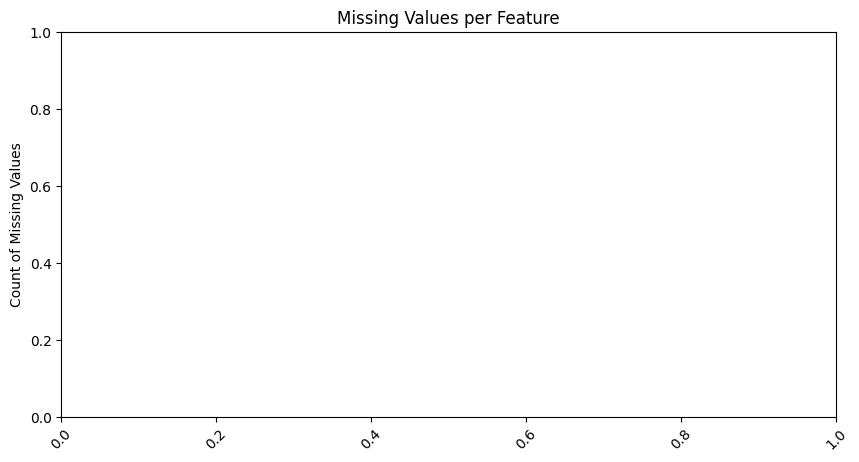

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.title("Missing Values per Feature")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

**Insights:** No missing values

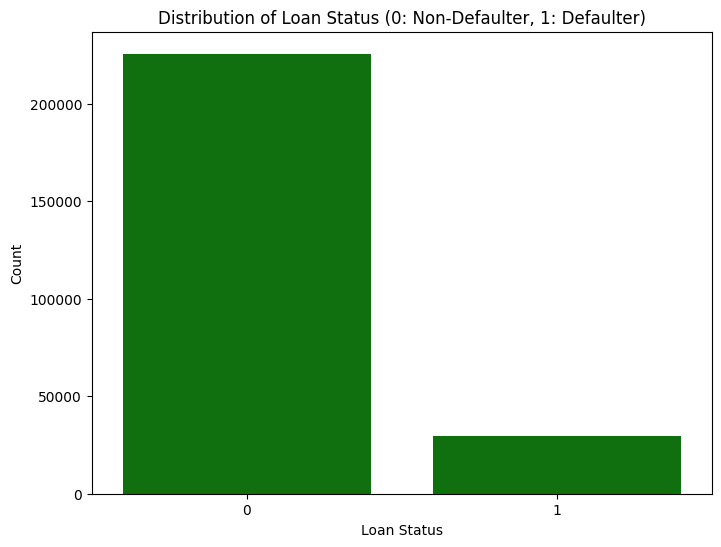

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Default', data=df,color= 'green')
plt.title('Distribution of Loan Status (0: Non-Defaulter, 1: Defaulter)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Default'].value_counts(normalize = True)*100

,proportion
Default,
0,88.387175
1,11.612825


**Insights:**  88 vs 12 default ratio

In [ ]:
#Find skewness of all numerical columns
loan_skew_vals = df.select_dtypes(include=['float64', 'int64']).skew().sort_values(ascending=False)
highly_skewed_cols = loan_skew_vals[(abs(loan_skew_vals) > 1)].index.tolist()
print("Highly skewed columns: ", loan_skew_vals)

Highly skewed columns:  Default           2.396377
CreditScore       0.004688
InterestRate      0.004608
Age               0.000698
NumCreditLines   -0.000278
Income           -0.000381
DTIRatio         -0.001499
LoanAmount       -0.001827
MonthsEmployed   -0.002142
LoanTerm         -0.002178
dtype: float64


**Insights:** absolute skewness > 1 is considered highly skewed. But, we won't be log transforming any columns as all values are less than 1 and thus have almost no skew

**Preprocessing and Model Building**

In [8]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [9]:
df.drop('LoanID',axis = 1,inplace = True)

In [12]:
#Label encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [13]:
X = df.drop('Default',axis = 1)
y = df['Default']
print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (255347, 16)
Target (y) shape: (255347,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (204277, 16)
Testing set shape: (51070, 16)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling applied successfully.")


Feature scaling applied successfully.


In [16]:
X_train_scaled[0]

array([ 9.94856384e-02, -1.16730672e+00,  1.69862750e+00,  3.12273511e-01,
       -1.17059064e+00, -4.49335224e-01, -1.33592848e+00,  1.41445950e+00,
        1.51294177e+00, -4.41695850e-01,  1.34297299e+00,  2.87962888e-04,
       -1.00043578e+00,  9.98654694e-01, -1.41579065e+00, -1.00023990e+00])

**SMOTETomek to handle the imbalance**

In [17]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train_scaled, y_train)

print("Before Resampling:", y_train.value_counts(normalize=True))
print("After Resampling:", y_train_res.value_counts(normalize=True))

Before Resampling: Default
0    0.883873
1    0.116127
Name: proportion, dtype: float64
After Resampling: Default
0    0.5
1    0.5
Name: proportion, dtype: float64


In [18]:
X_train_res.shape

(361006, 16)

In [19]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier( ),
    "Naive Bayes": GaussianNB()
}

In [20]:
for name, model in models.items():
    print(f"--- Training {name} ---")
    model.fit(X_train_res, y_train_res)
    print(f"{name} trained successfully.")

--- Training Logistic Regression ---
Logistic Regression trained successfully.
--- Training Random Forest ---
Random Forest trained successfully.
--- Training XGBoost ---
XGBoost trained successfully.
--- Training K-Nearest Neighbors ---
K-Nearest Neighbors trained successfully.
--- Training Decision Tree ---
Decision Tree trained successfully.
--- Training Naive Bayes ---
Naive Bayes trained successfully.


In [21]:
results = {}
train_results = {}

In [22]:
for name, model in models.items():
    print(f"\n--- Evaluation for {name} ---")


    y_pred = model.predict(X_train_res)
    y_pred_proba = model.predict_proba(X_train_res)[:, 1]


    print("Classification Report:")
    print(classification_report(y_train_res, y_pred))

    acc = accuracy_score(y_train_res, y_pred)

    auc_score = roc_auc_score(y_train_res, y_pred_proba)
    print(f"ROC-AUC Score: {auc_score:.4f}")

    train_results[name] = {"Acc_SMOTETomek":acc,"AUC_SMOTETomek":auc_score}
    cm = confusion_matrix(y_train_res, y_pred)
    print(cm)


--- Evaluation for Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69    180503
           1       0.69      0.70      0.70    180503

    accuracy                           0.69    361006
   macro avg       0.69      0.69      0.69    361006
weighted avg       0.69      0.69      0.69    361006

ROC-AUC Score: 0.7587
[[122623  57880]
 [ 53536 126967]]

--- Evaluation for Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    180503
           1       1.00      1.00      1.00    180503

    accuracy                           1.00    361006
   macro avg       1.00      1.00      1.00    361006
weighted avg       1.00      1.00      1.00    361006

ROC-AUC Score: 1.0000
[[180503      0]
 [     0 180503]]

--- Evaluation for XGBoost ---
Classification Report:
              precision    recall  f1-score   sup

In [ ]:
for name, model in models.items():
    print(f"\n--- Evaluation for {name} ---")


    y_pred = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_train)[:, 1]


    print("Classification Report:")
    print(classification_report(y_train, y_pred))

    acc = accuracy_score(y_train, y_pred)

    auc_score = roc_auc_score(y_train, y_pred_proba)
    print(f"ROC-AUC Score: {auc_score:.4f}")

    train_results[name] = {"Acc_SMOTETomek":acc,"AUC_SMOTETomek":auc_score}
    cm = confusion_matrix(y_train, y_pred)
    print(cm)


--- Evaluation for Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67     23722
           1       0.67      0.68      0.67     23722

    accuracy                           0.67     47444
   macro avg       0.67      0.67      0.67     47444
weighted avg       0.67      0.67      0.67     47444

ROC-AUC Score: 0.7373
[[15989  7733]
 [ 7699 16023]]

--- Evaluation for Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23722
           1       1.00      1.00      1.00     23722

    accuracy                           1.00     47444
   macro avg       1.00      1.00      1.00     47444
weighted avg       1.00      1.00      1.00     47444

ROC-AUC Score: 1.0000
[[23722     0]
 [    0 23722]]

--- Evaluation for Random Forest ---
Classification Report:
              precision    recall  f1-score   suppo

In [ ]:
train_results

{'Logistic Regression': {'Acc_SMOTETomek': 0.6747323159935924,
  'AUC_SMOTETomek': np.float64(0.7372643609259124)},
 'Decision Tree': {'Acc_SMOTETomek': 1.0, 'AUC_SMOTETomek': np.float64(1.0)},
 'Random Forest': {'Acc_SMOTETomek': 1.0, 'AUC_SMOTETomek': np.float64(1.0)},
 'KNN': {'Acc_SMOTETomek': 0.7036506196779361,
  'AUC_SMOTETomek': np.float64(0.7701367660705138)},
 'Naive Bayes': {'Acc_SMOTETomek': 0.675912654919484,
  'AUC_SMOTETomek': np.float64(0.7394066866675688)},
 'XGBoost': {'Acc_SMOTETomek': 0.7939254700278223,
  'AUC_SMOTETomek': np.float64(0.8803687112276799)}}

In [23]:
for name, model in models.items():
    print(f"\n--- Evaluation for {name} ---")


    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {auc_score:.4f}")

    results[name] = {"Acc_SMOTETomek":acc,"AUC_SMOTETomek":auc_score}
    cm = confusion_matrix(y_test, y_pred)
    print(cm)


--- Evaluation for Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     45139
           1       0.22      0.69      0.34      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.74     51070

ROC-AUC Score: 0.7498
[[30617 14522]
 [ 1813  4118]]

--- Evaluation for Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     45139
           1       0.40      0.14      0.21      5931

    accuracy                           0.88     51070
   macro avg       0.65      0.56      0.57     51070
weighted avg       0.84      0.88      0.85     51070

ROC-AUC Score: 0.7308
[[43934  1205]
 [ 5116   815]]

--- Evaluation for XGBoost ---
Classification Report:
              precision    recall  f1-score   support

  

In [26]:
train_results

{'Logistic Regression': {'Acc_SMOTETomek': 0.6913735505781068,
  'AUC_SMOTETomek': np.float64(0.7586992225017836)},
 'Random Forest': {'Acc_SMOTETomek': 1.0, 'AUC_SMOTETomek': np.float64(1.0)},
 'XGBoost': {'Acc_SMOTETomek': 0.9336299119682221,
  'AUC_SMOTETomek': np.float64(0.9722720663623415)},
 'K-Nearest Neighbors': {'Acc_SMOTETomek': 0.8841044193171305,
  'AUC_SMOTETomek': np.float64(0.9989831642096765)},
 'Decision Tree': {'Acc_SMOTETomek': 1.0, 'AUC_SMOTETomek': np.float64(1.0)},
 'Naive Bayes': {'Acc_SMOTETomek': 0.7013900045982615,
  'AUC_SMOTETomek': np.float64(0.772347415099587)}}

In [27]:
#Train results
df_results_train = pd.DataFrame(train_results).T.reset_index()
df_results_train.columns = ["Model","Accuracy(SMOTETomek)","AUC(SMOTETomek)"]
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.width", 1000)
print(df_results_train)

                 Model  Accuracy(SMOTETomek)  AUC(SMOTETomek)
0  Logistic Regression              0.691374         0.758699
1        Random Forest              1.000000         1.000000
2              XGBoost              0.933630         0.972272
3  K-Nearest Neighbors              0.884104         0.998983
4        Decision Tree              1.000000         1.000000
5          Naive Bayes              0.701390         0.772347


In [28]:
#test_results
df_results = pd.DataFrame(results).T.reset_index()
df_results.columns = ["Model","Accuracy(SMOTETomek)","AUC(SMOTETomek)"]
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.width", 1000)
print(df_results)

                 Model  Accuracy(SMOTETomek)  AUC(SMOTETomek)
0  Logistic Regression              0.680145         0.749800
1        Random Forest              0.876229         0.730774
2              XGBoost              0.886039         0.745873
3  K-Nearest Neighbors              0.659722         0.628745
4        Decision Tree              0.775191         0.560811
5          Naive Bayes              0.679557         0.743488


In [30]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd


def evaluate_model(model, X_train, y_train, X_test, y_test):
    metrics = {}
    # Train predictions
    y_pred_train = model.predict(X_train)
    y_proba_train = model.predict_proba(X_train)[:,1] if hasattr(model, "predict_proba") else None
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    metrics['ACC_Train'] = accuracy_score(y_train, y_pred_train)
    metrics['Recall_Train'] = recall_score(y_train, y_pred_train)
    metrics['Spec_Train'] = tn / (tn + fp)
    metrics['Prec_Train'] = precision_score(y_train, y_pred_train)
    metrics['F1_Train'] = f1_score(y_train, y_pred_train)
    metrics['AUC_Train'] = roc_auc_score(y_train, y_proba_train) if y_proba_train is not None else None

    # Test predictions
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    metrics['ACC_Test'] = accuracy_score(y_test, y_pred_test)
    metrics['Recall_Test'] = recall_score(y_test, y_pred_test)
    metrics['Spec_Test'] = tn / (tn + fp)
    metrics['Prec_Test'] = precision_score(y_test, y_pred_test)
    metrics['F1_Test'] = f1_score(y_test, y_pred_test)
    metrics['AUC_Test'] = roc_auc_score(y_test, y_proba_test) if y_proba_test is not None else None

    return metrics

# Evaluate models for SMOTETomek
results_smote = {}
for name, model in models.items():
    results_smote[name] = evaluate_model(model, X_train_res, y_train_res, X_test_scaled, y_test)

df_smote = pd.DataFrame(results_smote).T.reset_index()
df_smote.rename(columns={'index': 'Model'}, inplace=True)
print("=== SMOTETomek Results ===")
print(df_smote)

=== SMOTETomek Results ===
                 Model  ACC_Train  Recall_Train  Spec_Train  Prec_Train  F1_Train  AUC_Train  ACC_Test  Recall_Test  Spec_Test  Prec_Test   F1_Test  AUC_Test
0  Logistic Regression   0.691374      0.703407    0.679341    0.686876  0.695043   0.758699  0.680145     0.694318   0.678283   0.220923  0.335192  0.749800
1        Random Forest   1.000000      1.000000    1.000000    1.000000  1.000000   1.000000  0.876229     0.137414   0.973305   0.403465  0.205006  0.730774
2              XGBoost   0.933630      0.873537    0.993723    0.992866  0.929387   0.972272  0.886039     0.083460   0.991493   0.563140  0.145374  0.745873
3  K-Nearest Neighbors   0.884104      0.999712    0.768497    0.811972  0.896114   0.998983  0.659722     0.506323   0.679878   0.172062  0.256842  0.628745
4        Decision Tree   1.000000      1.000000    1.000000    1.000000  1.000000   1.000000  0.775191     0.281571   0.840050   0.187852  0.225356  0.560811
5          Naive Bayes   